## Preparing Tools

#### Importing all tools used in this project

In [1]:
# Regular EDA and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


## Load data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

## Data Exploration

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

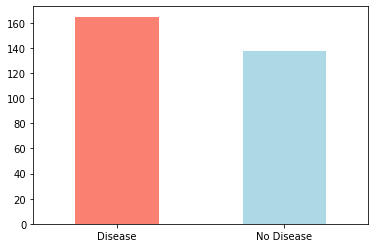

In [5]:
ax = df['target'].value_counts().plot(kind="bar"
                                ,color=["salmon", "lightblue"]);
ax.set_xticklabels(["Disease","No Disease"], rotation=0);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Heart Disease Frequency according to Sex

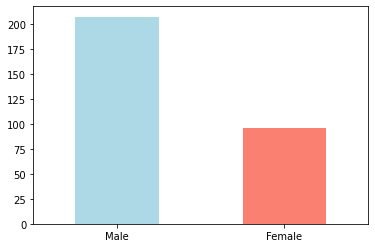

In [8]:
ax = df.sex.value_counts().plot(kind="bar"
                               ,color=["lightblue", "salmon"])
ax.set_xticklabels(["Male","Female"], rotation=0);

In [9]:
# Compare target coluns with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


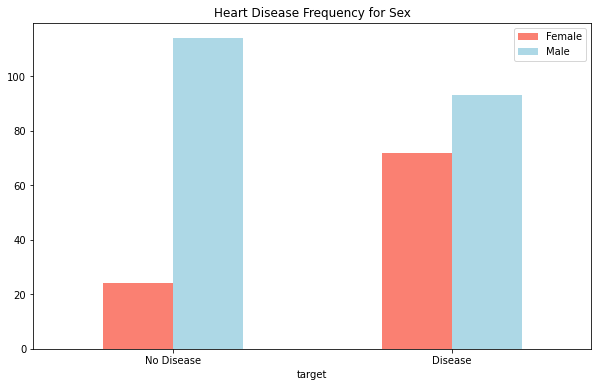

In [10]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar"
                                   ,figsize=(10, 6)
                                   ,color=("salmon", "lightblue")
                                   ).set_xticklabels(["No Disease", "Disease"]
                                                     ,rotation = 0)
plt.legend(["Female", "Male"])
plt.title("Heart Disease Frequency for Sex");

In [11]:
 df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


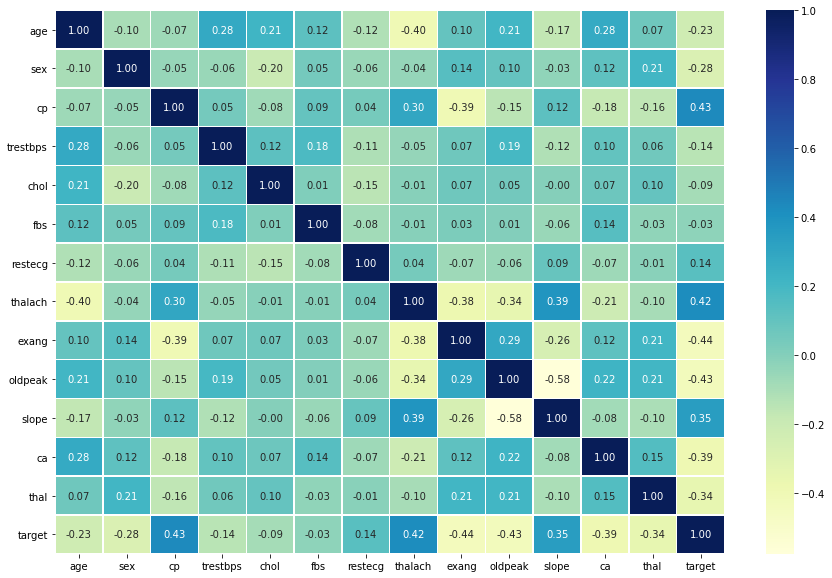

In [12]:
# HeatMap for the correlation matrix
corr_matrix = df.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix
                ,annot=True
                ,linewidths=0.5
                ,fmt="0.2f"
                ,cmap="YlGnBu")

## Modelling

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [15]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [16]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [17]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=(0.2),
                                                    random_state=1)


In [18]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3


In [19]:
# Put Models in a dict
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given ml model.
    models : a dict of different Scikit-Learn ml models
    """
    
    # Set random seed
    np.random.seed(1)
    
    # Make a dict to keep model scores
    models_score = {}
    
    # Loop throgh models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        
        # Evaluate the model and append its score to models_score
        models_score[name] = model.score(X_test, y_test)
    return models_score

In [20]:
models_score = fit_and_score(models
                            ,X_train
                            ,X_test
                            ,y_train
                            ,y_test)
models_score

E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7704918032786885,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.8032786885245902}

## Hyperparameter tuning

In [21]:
# Tunning KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors 
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train ))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [22]:
train_scores

[1.0,
 0.8264462809917356,
 0.7933884297520661,
 0.7975206611570248,
 0.7768595041322314,
 0.78099173553719,
 0.756198347107438,
 0.743801652892562,
 0.7231404958677686,
 0.731404958677686,
 0.731404958677686,
 0.7231404958677686,
 0.7148760330578512,
 0.7066115702479339,
 0.7107438016528925,
 0.71900826446281,
 0.6942148760330579,
 0.6983471074380165,
 0.7107438016528925,
 0.7107438016528925]

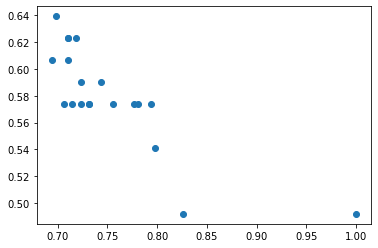

In [23]:
plt.scatter(x=train_scores, y= test_scores)

## Hyperparameter tuning with RandomizedSearchCV  

In [56]:
# Create a hyperparameter grid for LogisticRegresssion 
log_reg_grid = {"C" : np.logspace(-4, 4, 20)
               ,"solver": ["liblinear"]}
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50)
          ,"max_depth": [None, 3, 5, 10]
          ,"min_samples_split": np.arange(2, 20, 2)
          ,"min_samples_leaf": np.arange(1, 20, 2)}

In [52]:
# Tune LogisticRegression 
np.random.seed(1)

# Setup random hyperparameter search for LogisticRegression 
rs_log_reg = RandomizedSearchCV(LogisticRegression()
                               ,param_distributions=log_reg_grid
                               ,cv = 5
                               ,n_iter = 20
                               ,verbose=True)

# Fit random hyperparameter search model for LogisticRegression 
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [53]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [54]:
rs_log_reg.score(X_test, y_test)

0.7704918032786885

### Tuning Random forest

In [61]:
np.random.seed(1)

# Setup random hyperparameter search for RandomForestClassifier 
rs_rf = RandomizedSearchCV(RandomForestClassifier()
                          ,param_distributions=rf_grid
                          ,cv=5
                          ,n_iter=20
                          ,verbose =True)
# Fit random hyperparameter search model for RandomForestClassifier

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [62]:
# Fiind the best hyperparameter 
rs_rf.best_params_

{'n_estimators': 860,
 'min_samples_split': 12,
 'min_samples_leaf': 17,
 'max_depth': 5}

In [63]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.7868852459016393

## Hyperparameter Tuning with GridSearchCV

In [64]:
# Different hyperparameter for our LogisticRegression model
log_reg_grid = {"C":np.logspace(-4, 4, 30)
               ,"solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression 
gs_log_reg = GridSearchCV(LogisticRegression()
                         ,param_grid = log_reg_grid
                         ,cv = 5
                         ,verbose=True)
# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [76]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [77]:
# Evaluate
gs_log_reg.score(X_test, y_test)

0.7704918032786885

## Evaluating the tuned Machine learning classifier, beyond accuracy

In [79]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

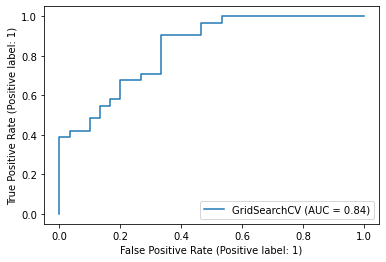

In [80]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [81]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[20 10]
 [ 4 27]]


In [82]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds)
                    ,annot=True
                    ,cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    plot_conf_mat(y_test, y_preds)

In [83]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



#### Calculate evaluation metrics using cross_validation

In [84]:
# Check best hyperparameters 
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [85]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.38566204211634725
                        ,solver="liblinear")

In [86]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf
                        ,X
                        ,y
                        ,cv=5
                        ,scoring="accuracy")
cv_acc

array([0.81967213, 0.8852459 , 0.86885246, 0.86666667, 0.75      ])

In [87]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8380874316939891

In [88]:
# Cross-validated precision
cv_precision= cross_val_score(clf
                        ,X
                        ,y
                        ,cv=5
                        ,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8154667272314331

In [89]:
# Cross-validated recall
cv_recall= cross_val_score(clf
                        ,X
                        ,y
                        ,cv=5
                        ,scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9151515151515153

In [90]:
# Cross-validated f1
cv_f1= cross_val_score(clf
                        ,X
                        ,y
                        ,cv=5
                        ,scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8614850462777628

<AxesSubplot:title={'center':'Cross_validated classification metrics'}>

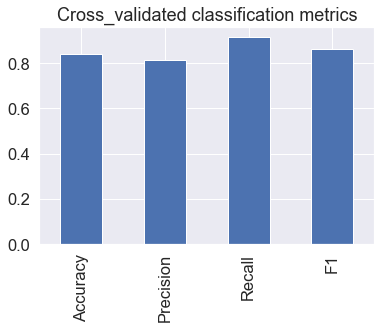

In [91]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc
                          ,"Precision": cv_precision
                          ,"Recall": cv_recall
                          ,"F1": cv_f1}
                         ,index=[0])
cv_metrics.T.plot.bar(title='Cross_validated classification metrics'
                     ,legend=False)

### Feature Importance
